## Statistical tests with Python:

### 1. Normality Tests

The normal distribution, also known as the Gaussian distribution, is a symmetric distribution where mean, median and mode are the same.

#### Graphical method:
There are various graphical methods for testing normality of a distribution. For example, Histogram with distribution curve, Box plot and more. Hre we are going to use probability plot (called Q Q or Quantile-Quantile Plot.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels as sm
from scipy.stats import norm
from plotnine import *
import matplotlib.pyplot as plt

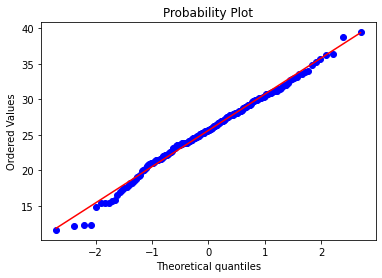

In [3]:
#Probability plot: # random normal data with mu=25, sigma = 5
data = np.random.normal(loc = 25, scale = 5, size = 200)
stats.probplot(data, dist = 'norm', plot = plt)
plt.show()

If our data form a normal distribution, we should see all the points sitting on the straight line.

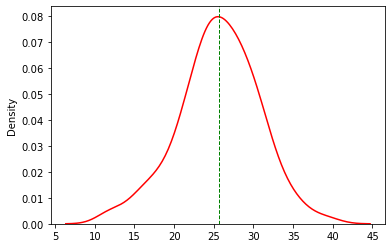

In [4]:
sns.kdeplot(data, color="r")
plt.axvline(data.mean(), color = 'g', linestyle = 'dashed', linewidth = 1)
plt.show()

#### Numerical Method:
There are varous nuerical tests for normality. For example Shapiro-Wilk Test, D’Agostino’s $K^2$ Test
and Anderson-Darling Test. Here we will use
#### Shapiro-Wilk Test:

##### Assumptions:
Observations in each sample are independent and identically distributed (iid).

##### Hypotheses:
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

##### Conclusion:
- If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
- If the p-value > 0.05, then we fail to reject the null hypothesis.

In [5]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(data)
print('stat = %.3f, p = %.3f' %(stat, p))
if p > 0.05:
    print('Fail to reject the null hypothesis (Probably Gaussian).')
else:
    print('Reject the null hypothesis (Probably not Gaussian).')

stat = 0.992, p = 0.301
Fail to reject the null hypothesis (Probably Gaussian).


### 2. Correlation Tests

This section lists statistical tests that you can use to check if two samples are related.
- Pearson’s Correlation Coefficient
- Spearman’s Rank Correlation
- Kendall’s Rank Correlation

Among these test here we are using:
#### Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.

Assumptions:

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Hypotheses:

- H0: the two samples are independent (i.e. Have no relationship).
- H1: there is a dependency between the samples (i.e. Have relationship).


In [6]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = pearsonr(data1, data2)
print('stat = %.3f, p = %.3f' % (stat, p))
if p > 0.05:
    print('Fail to reject the null hypothesis (Probably independent).')
else:
    print('Reject the null hypothesis (Probably dependent).')

stat = 0.688, p = 0.028
Reject the null hypothesis (Probably dependent).


### 3. Statistical Hypothesis Tests:
A statistical test examines two opposing hypotheses about a population: the null hypothesis and the alternative hypothesis. The null hypothesis states that a population parameter (such as the mean, the standard deviation, and so on) is equal to a hypothesized value. The alternative hypothesis mathematical opposite of the null hypothesis.
This section lists statistical tests that you can use to compare data samples.
- One-Sample Z test
- Two-Sample Z test
- One-Sample T-test (Student’s t-test)
- Two Samples T-Test (Paired Student’s t-test)
- Chi-Squared Test
- Analysis of Variance Test (ANOVA)

### Population Data
Let us assume, we have a data of Verbal and Math SAT Scores of 2000 students in a High School. The total number of boys is 1000 and that of girls is 1000.

In [7]:
# Loading Data
df = pd.read_csv('Sat_Scores.csv')
df.head()

,Gender,Verbal,Math
0,Female,606,506
1,Male,360,579
2,Female,620,631
3,Female,362,564
4,Male,628,564


In [8]:
df.shape

(2000, 3)

In [9]:
df.dtypes

Gender    object
Verbal     int64
Math       int64
dtype: object

In [11]:
df['Gender'].value_counts().to_frame()

,Gender
Female,1000
Male,1000


In [12]:
df.describe()

,Verbal,Math
count,2000.000000,2000.000000
mean,498.577500,546.414000
std,87.641854,83.057756
min,350.000000,400.000000
25%,422.000000,478.000000
50%,498.000000,548.500000
75%,574.000000,617.000000
max,650.000000,690.000000


#### One-Sample Z test
One sample Z test is used to compare the population mean to a sample. Population standard deviation must be known to perform the Z test and data should be normally distributed.



In [15]:
# H0: mu = 500
# H1: mu != 500
sample = np.random.choice(df.Verbal, 25)
sample

array([471, 437, 577, 514, 490, 587, 396, 632, 563, 630, 377, 402, 407,
       447, 396, 597, 513, 571, 602, 391, 490, 399, 603, 394, 547])

In [16]:
sample_mean = np.mean(sample)
sample_mean

497.32

In [18]:
x = sample_mean
mu = 500  # population mean
sigma = 87.6 # population std
n = 25 # sample size
z =  (x - mu)/(sigma / np.sqrt(n))
pval = 1 - stats.norm.cdf(z)
alpha = 0.05
if pval <= alpha:
    print('Reject null hypothesis.') # Reject Null Hypothesis 
if pval > alpha:
    print('Fail to reject null hypothesis.')# Failed to reject Null Hypothesis


Fail to reject null hypothesis.


In [19]:
# Another method for one sample z-test
from statsmodels.stats import weightstats as smsw
sample1 = sample
ztest ,pval = smsw.ztest(sample1, x2=None, value=500)
print(float(pval))
if pval<=0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

0.8789535565522048
Fail to reject null hypothesis


#### One-Sample Z test for Proportion
One-Sample Z test for proportion is used to compare an observed proportion to a theoretical one. The test of proportion can only be performed on categorical data.

In [20]:
#Let’s test the null hypothesis that, on average, twenty percent of women are unemployed.
# Then the corresponding null hypothesis is
# H0: p0 = 0.2
# H1: P0 != 0.2
p0 = 0.2 # theoretical proportion
p = 0.26 # proportion in a sample of 25
n = 25
z_stat = (p - p0) / np.sqrt(p0 * (1 - p0) / n)
pval = 1 - stats.norm.cdf(z_stat)
alpha = 0.05
if pval <= alpha:
    print('Reject null hypothesis')# Reject Null Hypothesis
if pval > alpha:
    print('Fail to reject null hypothesis')# Failed to reject Null Hypothesis

Fail to reject null hypothesis


#### Two-sample Z test:
In two sample z-test , we are checking two independent data groups and deciding whether sample mean of two group is equal or not.

- H0 : Difference of the means of two groups is 0 (means are equal)
- H1 : Difference of the means of two groups is not 0 (means are not equal)

In [21]:
sample1 = np.random.choice(df.Verbal, 40)
sample2 = np.random.choice(df.Verbal, 35)

In [23]:
from statsmodels.stats import weightstats as smsw
ztest ,pval1 = smsw.ztest(x1=sample1, x2=sample2, value=0,alternative='two-sided')
print(float(pval))
if pval<=0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

0.22662735237686826
Fail to reject null hypothesis


In [25]:
# Another method
x1 = np.mean(sample1)
x2 = np.mean(sample2)
n1 = 40 #sample1 size
n2 = 35 #sample2 size
sigma1 = np.std(sample1) #standard deviation of sample1
sigma2 = np.std(sample2) #standard deviation of sample2
mu = 500 #population mean
sigma = 87.6 #population standard deviation
z_stat = (x1 - x2)/np.sqrt((sigma1**2/n1) + (sigma2**2/n2))
pval = 1 - stats.norm.cdf(z_stat)
alpha = 0.05
if pval <= alpha:
    print('Reject the null hypothesis')# Reject Null Hypothesis
if pval > alpha:
    print('Fail to reject the null hypothesis')# Failed to reject Null Hypothesis

Fail to reject the null hypothesis


#### Two sample Z test for Proportion
Two Sample Z test for proportion is used to compare two proportions with a theoretical proportion.


In [27]:
p0 = 0.2 #theoretical proportion
p1 = 0.23 # proportion in first sample
p2 = 0.29 # proportion in second sample
n1 = 40 #sample1 size
n2 = 35 #sample2 size
z_stat = (p1 - p2)/np.sqrt(p0*(1-p0)*((1/n1) + (1/n2)))
pval = 1 - stats.norm.cdf(z_stat)
alpha = 0.05
if pval <= alpha:
    print('Reject the null hypothesis')# Reject Null Hypothesis
if pval > alpha:
    print('Fail to reject the null hypothesis')# Failed to reject Null Hypothesis

Fail to reject the null hypothesis


#### Student’s T-test
#### One-Sample T-test
One sample T-test is used to compare the population mean to a sample. This test is similar to the Z test as it checks the same thing. The difference between these two tests is that the Z test needs population standard deviation but the T-test needs sample standard deviation. If the sample size is greater than 30 One sample T-test is always used regardless of the known population standard deviation and is equivalent to Z-test.

In [31]:
from scipy import stats
sample = np.random.choice(df.Verbal, 25)
n = 25
popmean = np.mean(df.Verbal)
t_stat, pval = stats.ttest_1samp(sample, popmean)
print('p-values = ',pval)
alpha = 0.05
if pval <= alpha:
    print('Reject the null hypothesis')# Reject Null Hypothesis
if pval > alpha:
    print('Fail to reject the null hypothesis')# Failed to reject Null Hypothesis

p-values =  0.16841035893705877
Fail to reject the null hypothesis


In [33]:
# Another method using critical values:
df = 24 # degree of freedom n-1 = 24
critical_value  = stats.t.ppf(1 - 0.05, df)
print('t ctitical value =',critical_value)
p = 1 - stats.t.cdf(t_stat, df)
alpha = 0.05
if p <= alpha:
    print('Reject the null hypothesis')# Reject Null Hypothesis
if p > alpha:
    print('Fail to reject the null hypothesis')# Failed to reject Null Hypothesis

t ctitical value = 1.7108820799094275
Fail to reject the null hypothesis


#### Two Samples T-Test
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

Assumptions:

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Hypotheses:

- H0: the means of the samples are equal.
- H1: the means of the samples are unequal.


In [35]:
df = pd.read_csv('Sat_Scores.csv')
df.head()

,Gender,Verbal,Math
0,Female,606,506
1,Male,360,579
2,Female,620,631
3,Female,362,564
4,Male,628,564


In [36]:
sample1 = np.random.choice(df.Verbal, 20)
sample2 = np.random.choice(df.Verbal, 25)

In [37]:
t_stat, pval =  stats.ttest_ind(sample1, sample2)
print('p-value =',pval)
alpha = 0.05
if pval <= alpha:
    print('Reject the null hypothesis')# Reject Null Hypothesis
if pval > alpha:
    print('Fail to reject the null hypothesis')# Failed to reject Null Hypothesis

p-value = 0.7966269493978103
Fail to reject the null hypothesis


#### Paired T-test

Tests whether the means of two paired samples are significantly different. The paired sample t-test is also called dependent sample t-test. It’s an uni variate test that tests for a significant difference between 2 related variables. An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.

Assumptions:

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.
- Observations across each sample are paired.

Hypotheses:

- H0: the means of the samples are equal.
- H1: the means of the samples are unequal.


In [49]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
# blood pressure before treatment
data1 = [120, 123, 126, 127, 125, 114, 129, 132, 118, 125, 140, 135, 
         131, 112, 117, 126, 118, 126, 127, 115]
# blood pressure before treatment
data2 = [110, 113, 116, 127, 115, 124, 119, 122, 128, 115, 130, 125, 
         141, 122, 127, 116, 118, 118, 124, 125]
t_stat, pval = ttest_rel(data1, data2)
print('t-stat = %.2f, p-value = %.2f' % (t_stat, pval))
alpha = 0.05
if pval <= alpha:
    print('Reject the null hypothesis')# Reject Null Hypothesis
if pval > alpha:
    print('Fail to reject the null hypothesis')# Failed to reject Null Hypothesis

t-stat = 1.27, p-value = 0.22
Fail to reject the null hypothesis


In [52]:
# Method of two sample t-test
t_stat, pval = stats.ttest_ind(data1, data2)
print('t-stat = %.2f, p-value = %.2f' % (t_stat, pval))
alpha = 0.05
if pval <= alpha:
    print('Reject the null hypothesis')# Reject Null Hypothesis
if pval > alpha:
    print('Fail to reject the null hypothesis')# Failed to reject Null Hypothesis

t-stat = 1.12, p-value = 0.27
Fail to reject the null hypothesis


#### Analysis of Variance Test (ANOVA)

ANOVA tests whether the means of two or more independent samples are significantly different. It is used to compare means between three or more samples. It is the same as Independent T-test for two samples.


Assumptions:

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Hypotheses:

- H0: the means of the samples are equal.
- H1: one or more of the means of the samples are unequal.

##### One Way F-test(ANOVA) : 
It tells whether or not two or more groups are similar based on their mean similarity and f-score.

In [54]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat = %.3f, p = %.3f' % (stat, p))
if p <= 0.05:
    print('Probably different distribution') # Reject null
else:
    print('Probably the same distributions') # Fail to reject null

stat = 0.096, p = 0.908
Probably the same distributions


In [55]:
# Another example with the following salary data set
sal = pd.read_csv('salary.csv')
sal.head()

,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N


Example : there are 3 different category of education and salaries and need to check whether all 3 group are similar or not based on the mean salary.


In [61]:
# get ANOVA table as R like output
import statsmodels.api as smp
from statsmodels.formula.api import ols
model = ols('salary ~ education', data = sal).fit()
anova_table = smp.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq    df         F    PR(>F)
education  1.091346e+08   2.0  2.630597  0.083601
Residual   8.919629e+08  43.0       NaN       NaN


The p value obtained from ANOVA analysis is not significant (p > 0.05) (Fail to reject the null hypothesis), and therefore, we conclude that there is no significant differences among the educations.

In [63]:
# Another way
sal_anova = sal[['salary','education']]
groups = pd.unique(sal_anova.education.values)

group_data = {group:sal_anova['salary'][sal_anova.education == group] for group in groups}
 
F, p = stats.f_oneway(group_data['Bachelor'], group_data['Ph.D'], group_data['Master'])

print("p-value for significance is: ", p)

if p<= 0.05:
    print("Reject null hypothesis")
else:
    print("Do not reject null hypothesis")

p-value for significance is:  0.08360139265047647
Do not reject null hypothesis


#### Two Way F-test :
Two way F-test is extension of 1-way f-test, it is used when we have 2 independent variable and 2+ groups. 2-way F-test does not tell which variable is dominant. if we need to check individual significance then Post-hoc testing need to be performed.
##### Chi-Square Test:

This test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables using a contingency table. There are three kinds of chi-squared tests: the test of independence, the goodness of fit, and the test of homogeneity. 

For example, in an election survey, voters might be classified by gender (male or female) and voting preference (Democrat, Republican, or Independent). We could use a chi-square test for independence to determine whether gender is related to voting preference.


Here we can use our salary data with categorical variables 'education' and 'management'.

In [64]:
# Contingency table:
contingency_table = pd.crosstab(sal["education"], sal["management"])
print('contingency_table:\n',contingency_table)

contingency_table:
 management   N  Y
education        
Bachelor     9  5
Master      12  7
Ph.D         5  8


In [65]:
# Observed Values
Observed_Values = contingency_table.values 
print("Observed Values:\n",Observed_Values)

Observed Values:
 [[ 9  5]
 [12  7]
 [ 5  8]]


In [68]:
# Expected Values:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print('Expected Values:\n',Expected_Values)

Expected Values:
 [[ 7.91304348  6.08695652]
 [10.73913043  8.26086957]
 [ 7.34782609  5.65217391]]


In [77]:
# Degree of Freedom and Significance level
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
dof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom = ", dof)
alpha = 0.05
print('Significance level = ', alpha)

Degree of Freedom =  1
Significance level =  0.05


In [78]:
#chi-square statistic
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic = ",chi_square_statistic)

chi-square statistic =  2.4093362103483558


In [79]:
# critical value
critical_value=chi2.ppf(q=1-alpha,df=dof)
print('critical_value = ',critical_value)

critical_value =  3.841458820694124


In [80]:
#p-value
p_value = 1-chi2.cdf(x = chi_square_statistic, df = dof)
print('p-value = ', p_value)

p-value =  0.1206135000059404


In [81]:
print('Summary:')
print('Significance level = ', alpha)
print('Degree of Freedom = ', dof)
print('chi-square statistic = ', chi_square_statistic)
print('critical_value = ', critical_value)
print('p-value = ', p_value)

Summary:
Significance level =  0.05
Degree of Freedom =  1
chi-square statistic =  2.4093362103483558
critical_value =  3.841458820694124
p-value =  0.1206135000059404


In [82]:
# Chi Square Test with critical value
if chi_square_statistic >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Fail to reject H0,There is no relationship between 2 categorical variables")

Fail to reject H0,There is no relationship between 2 categorical variables


In [83]:
# Chi Square Test with p value
if p_value <= alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Fail to reject H0,There is no relationship between 2 categorical variables")

Fail to reject H0,There is no relationship between 2 categorical variables
